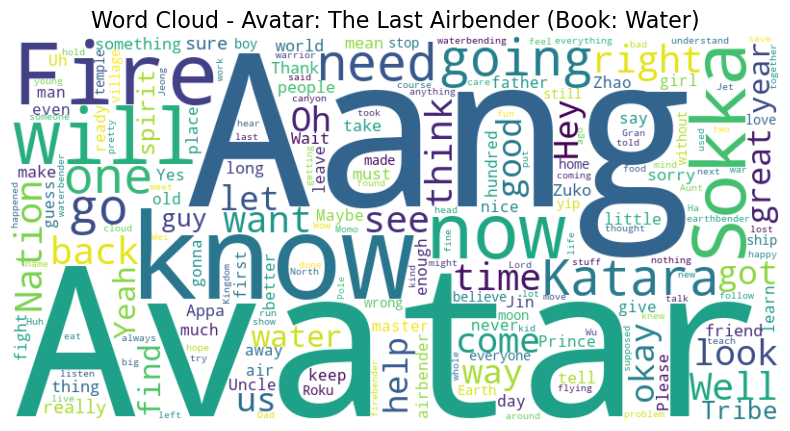

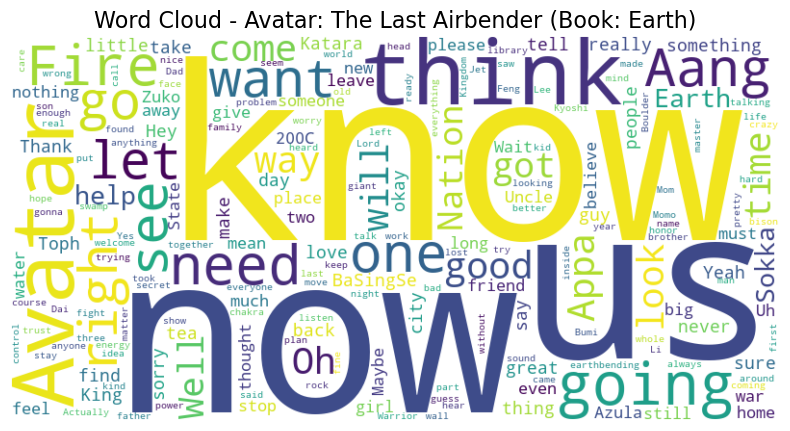

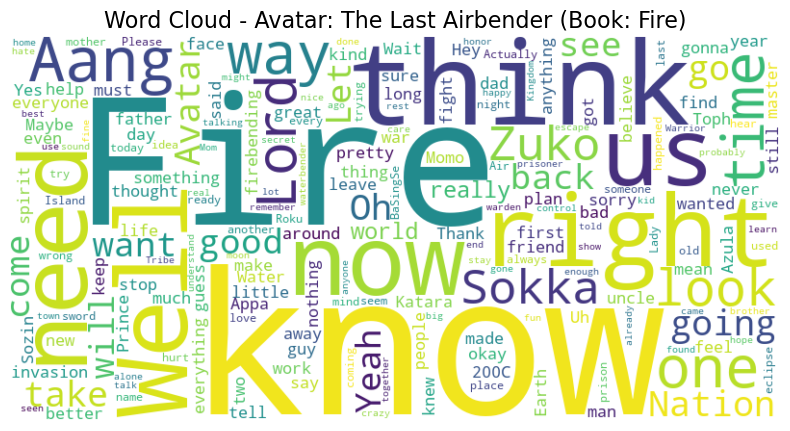

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Load the dataset
file_path = 'data/avatar.csv'  # Replace with your file's location
avatar_data = pd.read_csv(file_path, encoding='latin1')  # Use 'latin1' encoding to handle special characters

# List of book names to generate word clouds for
books = ['water', 'earth', 'fire']

clean_words_column = 'character_words'

# Loop through each book and generate a word cloud
for book in books:
    # Filter the data for the current book
    book_data = avatar_data[avatar_data['book'].str.strip().str.lower() == book]
    
    # Combine all the text from the relevant column
    book_text = " ".join(book_data[clean_words_column].dropna())
    
    # Preprocess the text:
    # - Replace "Ba Sing Se" with "BaSingSe" to treat it as one word
    # - Remove standalone "u" using regex (e.g., " u ", " u,", " u.")
    book_text = re.sub(r'\bBa Sing Se\b', 'BaSingSe', book_text, flags=re.IGNORECASE)  # Ensure "Ba Sing Se" becomes one word
    book_text = re.sub(r'\bu\b', '', book_text, flags=re.IGNORECASE)  # Remove standalone "u"

    # Generate the word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color="white", 
        collocations=False  # Avoid bigram combinations
    ).generate(book_text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - Avatar: The Last Airbender (Book: {book.title()})", fontsize=16)
    plt.show()
